In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import re
import seaborn as sns

### 1. Load the file into a pandas dataframe

In [2]:
data = pd.read_csv('hr.csv')
data.head(7)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


### 2. Basic statistical parameters

In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# NOTE! Смотря на колонну last_evaluation, у которой максимум 1 и минимум 0.36, кажется, что в описании ошибка
# и здесь не время с момента последней оценки, а это и есть сама последняя оценка данная работодателем.
# Нашла линк с описанием датасета https://mef-bda503.github.io/gpj-2yaka/Group_Project2Yaka.html, где идея подтверждается 
# 2nd Column: Last evaluation score

### 3a. Count and visualize correlation for quantitative parameters

In [5]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


/Users/anastasia/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

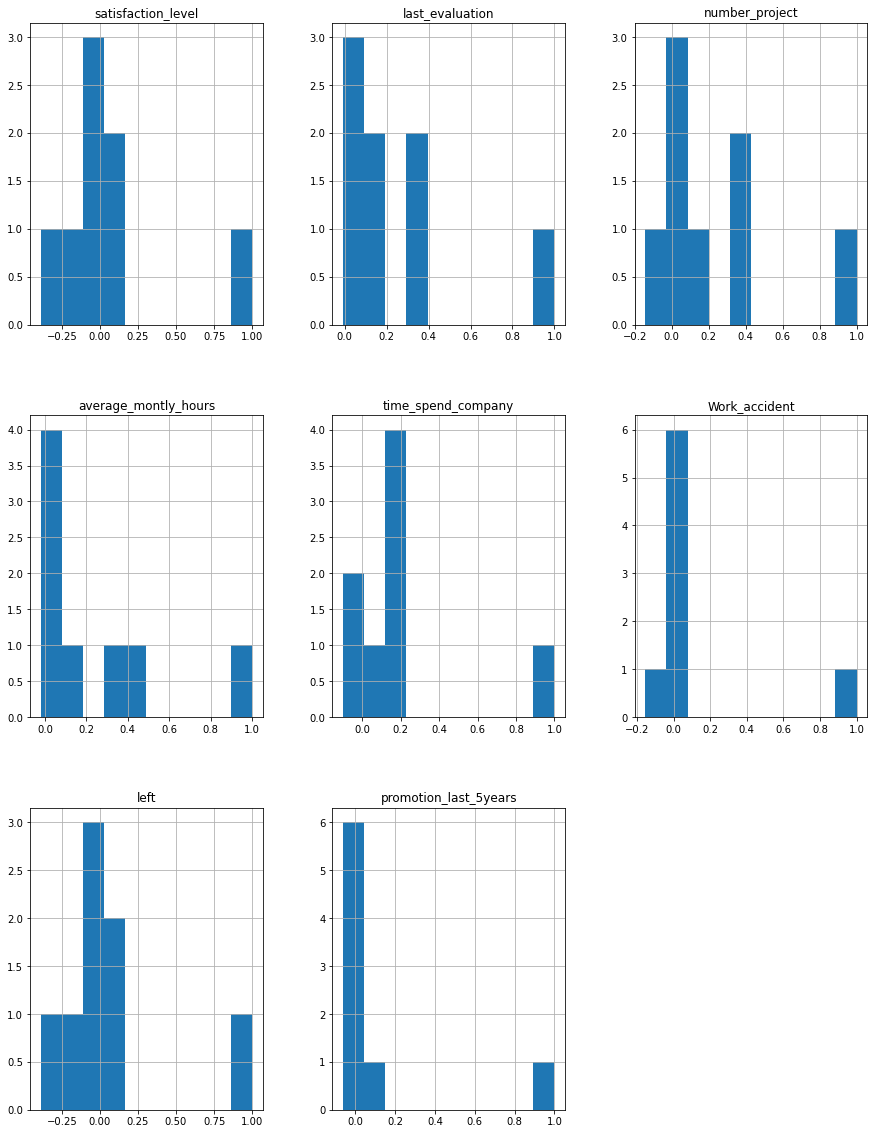

In [75]:
# видно, что максимумальная корреляция не превосходит 0.5 (считаю, чтобы использовать для heatmap)
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.corr().hist(ax = ax, bins = 10)

<AxesSubplot:>

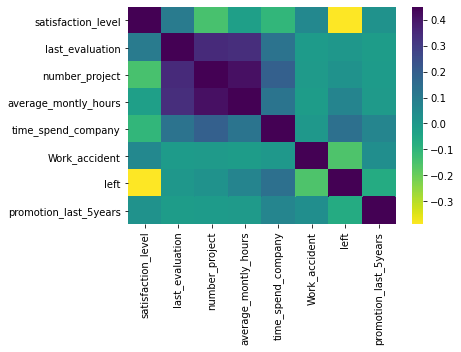

In [8]:
# чтобы отчетливее были видно корреляцию, установим максимум на 0.45

sns.heatmap(data.corr(), cmap='viridis_r', vmax = 0.45)

### 3b. Identify the most and the least correlated characteristics

Как уже видно из heatmap, самые скоррелированные характеристики это average_montly_hours и number_project.
Найдем наименнее скорреллированные переменные

In [12]:
df_min = data.corr().apply(lambda x: abs(x))
df_min.min().min()

0.0021204180967097077

Из таблицы корреляции мы видим, что это time_spend_company и Work_accident

### 4. Count number of workers for each department 

In [15]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### 5. Show salary spread 

<AxesSubplot:>

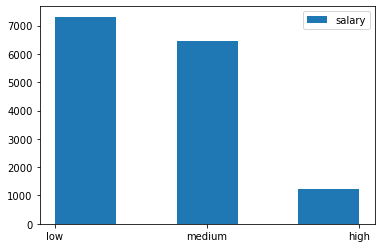

In [25]:
data['salary'].hist(bins = 5, legend = True, grid = False)

### 6. Show salary spread for each department

array([[<AxesSubplot:title={'center':'IT'}>,
        <AxesSubplot:title={'center':'RandD'}>,
        <AxesSubplot:title={'center':'accounting'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'management'}>,
        <AxesSubplot:title={'center':'marketing'}>],
       [<AxesSubplot:title={'center':'product_mng'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'technical'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

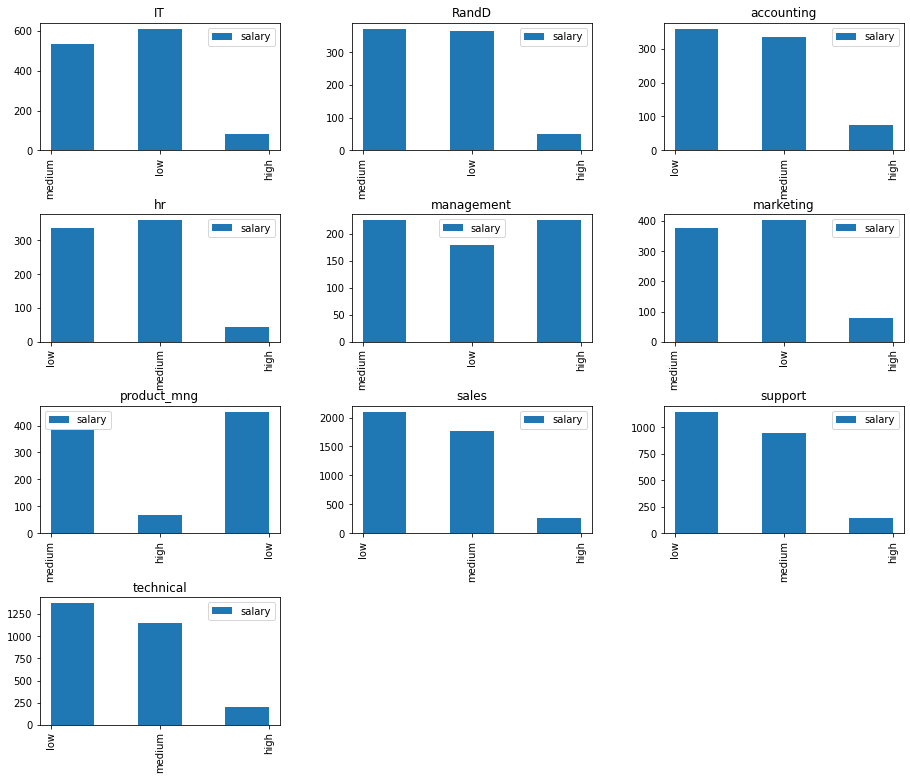

In [62]:
data['salary'].hist(by = data['department'], bins = 5, legend = True, figsize = (15,13))

### 7. Check hyposis that highly paid employees spend more time at work than those underpaid

### 8. Count some characteristics for employees who resigned and those who did not

**Resigned**

In [122]:
#Доля сотрудников с повышением за последние 5 лет
total_res = data[data['left']==1].count()[0] # общее число уволившихся
prom_res = data[data['left']==1].query('promotion_last_5years==1').count()[0]
perc_res = prom_res / total_res
print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся {perc_res:.2%}')

Доля сотрудников с повышением за последние 5 лет среди уволившихся 0.53%


In [128]:
# Средняя степень удовлетворенности
sat_res = data[data['left']==1]['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности среди уволившихся сотрудников {sat_res:.2f}')

Средняя степень удовлетворенности среди уволившихся сотрудников 0.44


In [126]:
# Среднее количество проектов
pr_res = data[data['left']==1]['number_project'].mean()
print(f'Среднее количество проектов у уволившихся сотрудников {pr_res:.2f}')

Среднее количество проектов у уволившихся сотрудников 3.86


**Not resigned**

In [132]:
#Доля сотрудников с повышением за последние 5 лет
total_st = data[data['left']==0].count()[0] # общее число уволившихся
prom_st = data[data['left']==0].query('promotion_last_5years==1').count()[0]
perc_st = prom_st / total_st
print(f'Доля сотрудников с повышением за последние 5 лет среди оставшихся на работе {perc_st:.2%}')

Доля сотрудников с повышением за последние 5 лет среди оставшихся на работе 2.63%


In [133]:
# Средняя степень удовлетворенности
sat_st = data[data['left']==0]['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности среди не уволившихся сотрудников {sat_st:.2f}')

Средняя степень удовлетворенности среди не уволившихся сотрудников 0.67


In [134]:
# Среднее количество проектов
pr_st = data[data['left']==0]['number_project'].mean()
print(f'Среднее количество проектов у не уволившихся сотрудников {pr_st:.2f}')

Среднее количество проектов у не уволившихся сотрудников 3.79


### 9. LDA model

In [172]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [168]:
X = data.drop('department', axis=1).drop('salary', axis = 1).drop('left', axis = 1)
type(X)

pandas.core.frame.DataFrame

In [178]:
y=data.left.values# прогнозируем уволился ли сотрудник
y

array([1, 1, 1, ..., 1, 1, 1])

In [179]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # разбиваем данные 

In [180]:
X_test.shape

(3750, 7)

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # обучаем

LinearDiscriminantAnalysis()

In [182]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [183]:
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [184]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [185]:
result

,0,1
0,1,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,0


In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.76